# **Automatidata (case-study)**

## Cleaning and EDA
In this stage, I will examine data provided and prepare it for analysis. I will also design a professional data visualization that tells a story, and help data-driven decisions for business needs.

### Approach
1. Imports, links, and loading
2. Data Cleaning
3. Data Exploration
4. Tableau Dashboard

### Imports, links, and loading

In [2]:
# Import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv', index_col=0)

### Data cleaning

In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
df.shape

(22699, 17)

In [6]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               22699 non-null  int64  
 1   tpep_pickup_datetime   22699 non-null  object 
 2   tpep_dropoff_datetime  22699 non-null  object 
 3   passenger_count        22699 non-null  int64  
 4   trip_distance          22699 non-null  float64
 5   RatecodeID             22699 non-null  int64  
 6   store_and_fwd_flag     22699 non-null  object 
 7   PULocationID           22699 non-null  int64  
 8   DOLocationID           22699 non-null  int64  
 9   payment_type           22699 non-null  int64  
 10  fare_amount            22699 non-null  float64
 11  extra                  22699 non-null  float64
 12  mta_tax                22699 non-null  float64
 13  tip_amount             22699 non-null  float64
 14  tolls_amount           22699 non-null  float

In [8]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22699 entries, 24870114 to 17208911
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               22699 non-null  int64         
 1   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 3   passenger_count        22699 non-null  int64         
 4   trip_distance          22699 non-null  float64       
 5   RatecodeID             22699 non-null  int64         
 6   store_and_fwd_flag     22699 non-null  object        
 7   PULocationID           22699 non-null  int64         
 8   DOLocationID           22699 non-null  int64         
 9   payment_type           22699 non-null  int64         
 10  fare_amount            22699 non-null  float64       
 11  extra                  22699 non-null  float64       
 12  mta_tax                22699 non-null  float64    

In [10]:
invalid_rows = df[df.total_amount < 0]
df.drop(invalid_rows.index, axis=0, inplace=True)

In [11]:
invalid_rows2 = df[(~df.extra.isin([0, .5, 1])) | (df.RatecodeID > 6)]
df.drop(invalid_rows2.index, axis=0, inplace=True)

In [12]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000,22583.000000
mean,1.555861,1.642076,2.853487,1.034628,162.470575,161.576983,1.335518,12.864799,0.315104,0.498029,1.812442,0.294615,0.299920,16.090217
std,0.496881,1.284999,3.526785,0.273155,66.668520,70.165348,0.493281,12.975309,0.370373,0.031328,2.740442,1.366377,0.004889,15.700202
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.745000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.010000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.370000,0.000000,0.300000,17.760000
max,2.000000,6.000000,33.960000,5.000000,265.000000,265.000000,4.000000,999.990000,1.000000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Data Exploration

### Explore Variables Distributions

In [13]:
sns.set(rc={'figure.figsize': (15, 6), 'axes.labelsize': 14, 'axes.titlesize': 16})
# Blue, Red, Yellow, Green Respectivily
colors = ["#4285F4", "#EA4335", "#FBBC05", "#34A853"]

#### VendorID, RatecodeID, Payment_type Percentages

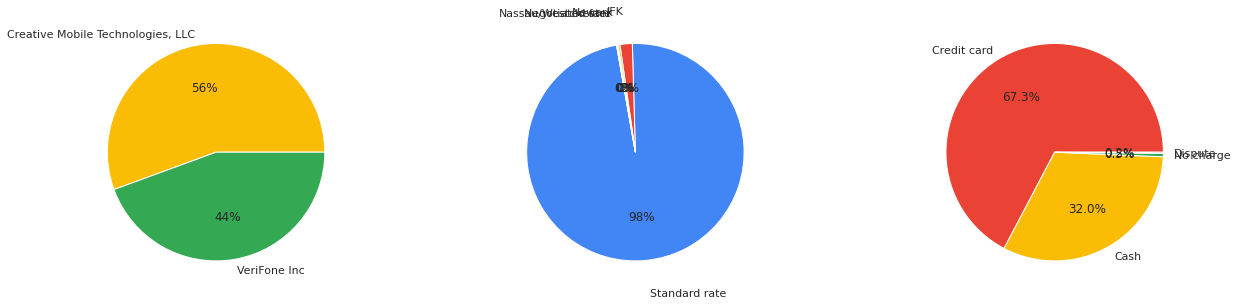

In [14]:
# Create a sub plots for VendorID, RatecodeID, payment_type
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

keys = [["Creative Mobile Technologies, LLC", "VeriFone Inc"],
        ["Standard rate", "JFK", "Newark", "Nassau/Westchester", "Negotiated fare"],
       ["Credit card", "Cash", "No charge", "Dispute"]]

#VendorID
ax[0].pie(
    df.VendorID.value_counts(), 
    labels=keys[0],
    colors=colors[2:],
    autopct='%.0f%%')
#RatecodeID
ax[1].pie(
    df.RatecodeID.value_counts(),
    labels=keys[1],
    colors=colors,
    autopct='%.0f%%',
    startangle=100,
    labeldistance=1.3)
#payment_type
ax[2].pie(
    df.payment_type.value_counts(),
    labels=keys[2],
    colors=colors[1:],
    autopct='%.1f%%')
plt.subplots_adjust(left=-.2);

**trip distance**

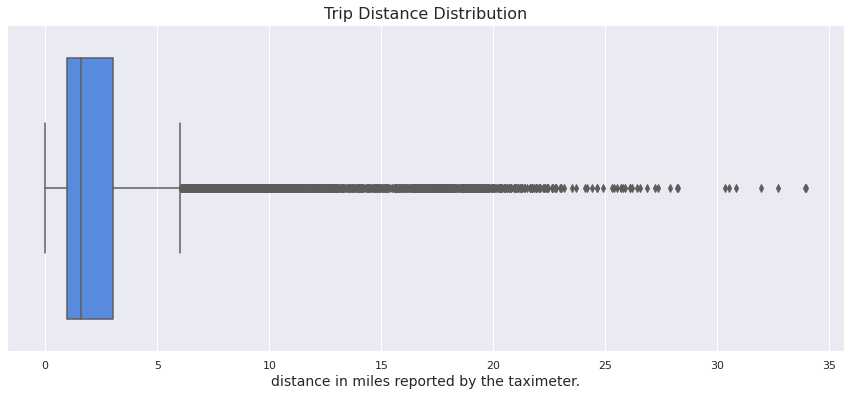

In [15]:
# Create box plot of trip_distance
sns.boxplot(df.trip_distance, color=colors[0])
plt.title("Trip Distance Distribution")
plt.xlabel("distance in miles reported by the taximeter.");

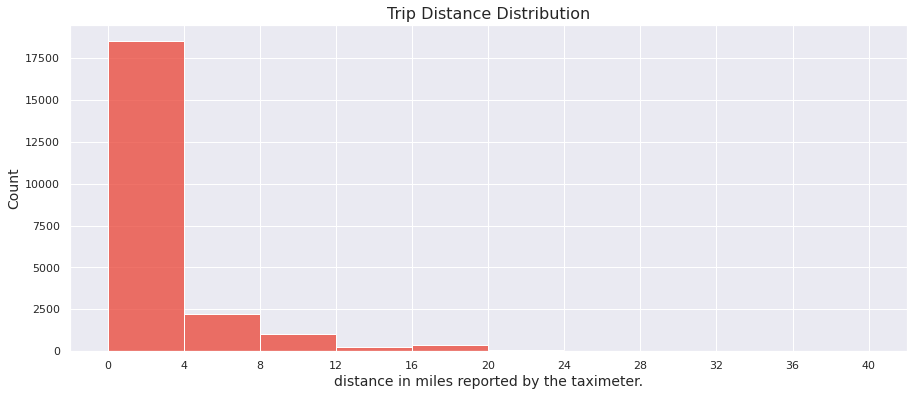

In [16]:
# Create histogram of trip_distance
ax = sns.histplot(df.trip_distance, color=colors[1], bins=range(0, 41, 4))
ax.set_title("Trip Distance Distribution")
ax.set_xlabel("distance in miles reported by the taximeter.")
ax.set_xticks(range(0, 41, 4));

**total amount**

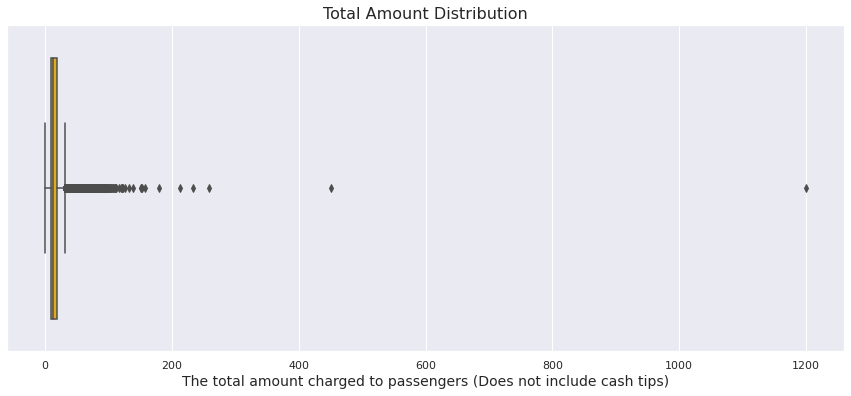

In [17]:
# Create box plot of total_amount
sns.boxplot(df.total_amount, color=colors[2])
plt.title("Total Amount Distribution")
plt.xlabel("The total amount charged to passengers (Does not include cash tips)");

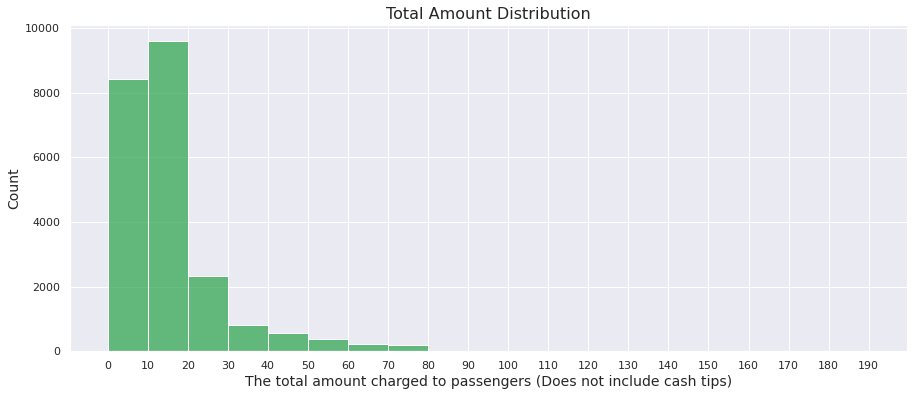

In [18]:
# Create histogram of total_amount
ax = sns.histplot(df.total_amount, color=colors[3], bins=range(0, 200, 10))
ax.set_title("Total Amount Distribution")
ax.set_xlabel("The total amount charged to passengers (Does not include cash tips)")
ax.set_xticks(range(0, 200, 10));

**tip amount**

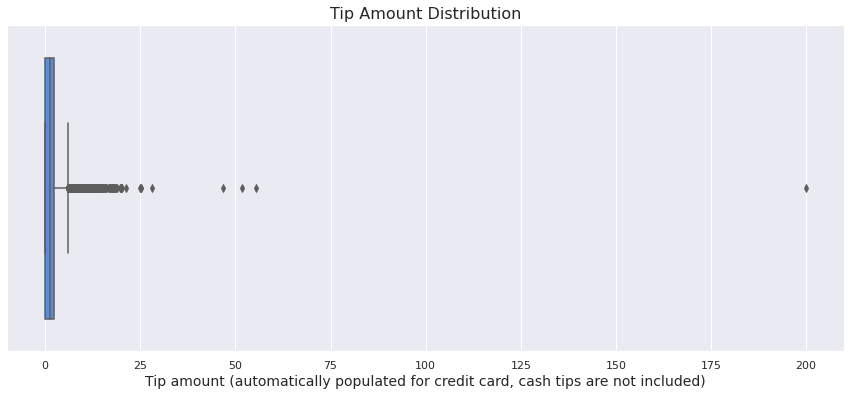

In [19]:
# Create box plot of tip_amount
sns.boxplot(df.tip_amount, color=colors[0])
plt.title("Tip Amount Distribution")
plt.xlabel("Tip amount (automatically populated for credit card, cash tips are not included)");

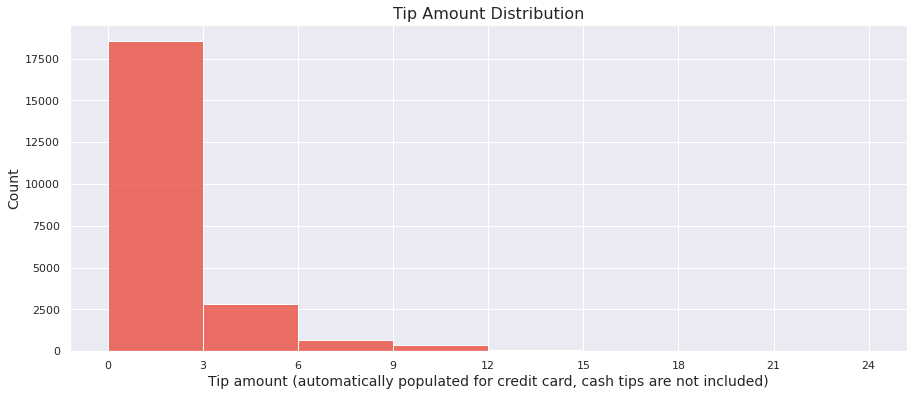

In [20]:
# Create histogram of tip_amount
ax = sns.histplot(df.tip_amount, color=colors[1], bins=range(0, 25, 3))
ax.set_title("Tip Amount Distribution")
ax.set_xlabel("Tip amount (automatically populated for credit card, cash tips are not included)")
ax.set_xticks(range(0, 25, 3));

**tip_amount by vendor**

In [21]:
df.VendorID.value_counts()

2    12553
1    10030
Name: VendorID, dtype: int64

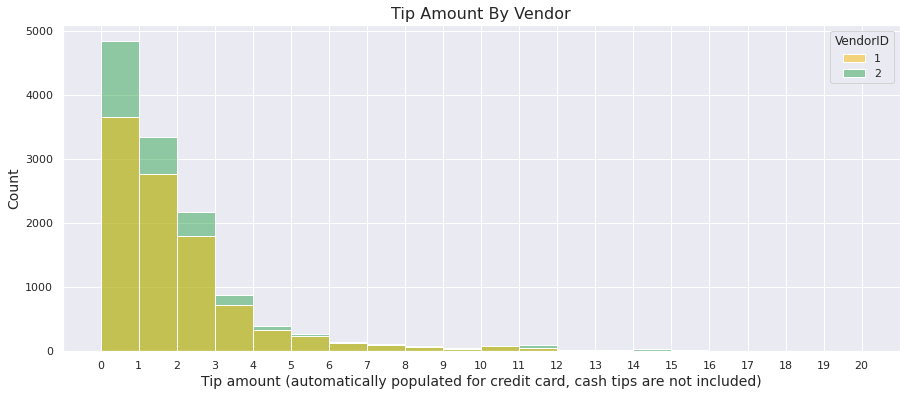

In [22]:
# Create histogram of tip_amount by vendor
ax = sns.histplot(df, x=df.tip_amount, hue=df.VendorID, bins=range(0, 21, 1), palette=colors[2:])
ax.set_title("Tip Amount By Vendor")
ax.set_xlabel("Tip amount (automatically populated for credit card, cash tips are not included)")
ax.set_xticks(range(0, 21, 1));

Zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

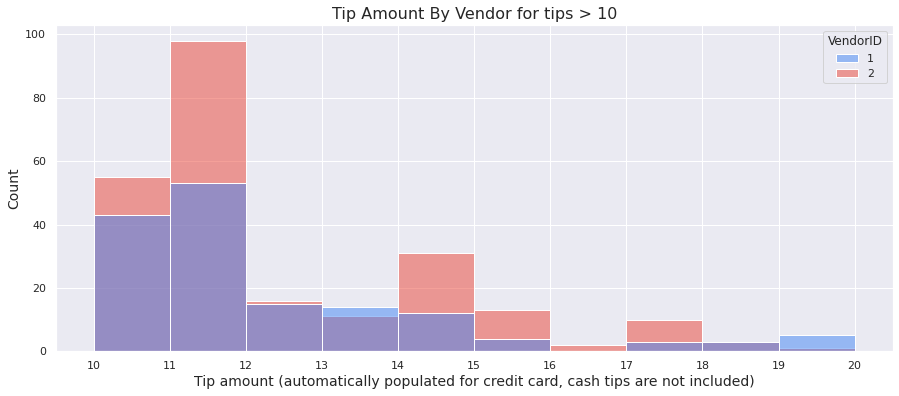

In [23]:
# Create histogram of tip_amount by vendor for tips > $10
tips_gt_10 = df[df.tip_amount > 10]
ax = sns.histplot(tips_gt_10, 
                  x=tips_gt_10.tip_amount, 
                  hue=tips_gt_10.VendorID, bins=range(10, 21, 1),
                  palette=colors[:2])
ax.set_title("Tip Amount By Vendor for tips > 10")
ax.set_xlabel("Tip amount (automatically populated for credit card, cash tips are not included)")
ax.set_xticks(range(10, 21, 1));

**Mean tips by passenger count**

In [24]:
# Calculate mean tips by passenger_count
mean_tips_passenger =  df.groupby("passenger_count").mean()[["tip_amount"]].reset_index()
mean_tips_passenger

,passenger_count,tip_amount
0,0,2.202500
1,1,1.827412
2,2,1.818583
3,3,1.684842
4,4,1.537020
5,5,1.841476
6,6,1.725494


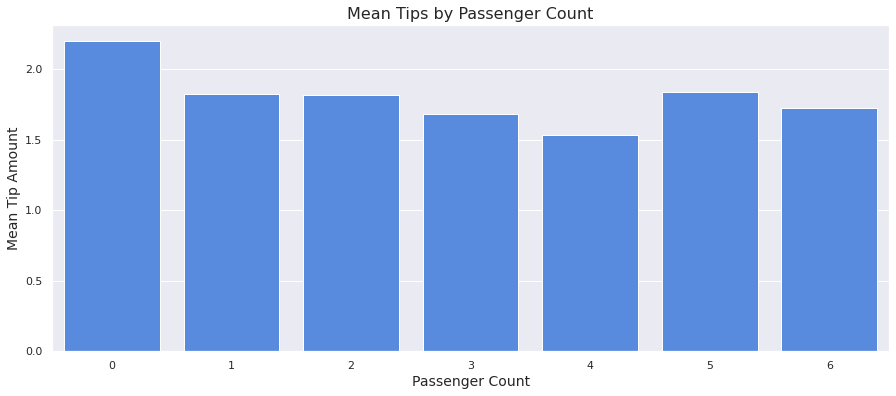

In [25]:
# Create bar plot for mean tips by passenger count
ax = sns.barplot(x=mean_tips_passenger.passenger_count, y=mean_tips_passenger.tip_amount, color=colors[0])
ax.set_title("Mean Tips by Passenger Count")
ax.set_xlabel("Passenger Count")
ax.set_ylabel("Mean Tip Amount");

**Create month and day columns**

In [26]:
# Create a month column
df["month"] = df.tpep_pickup_datetime.dt.month
# Create a day column
df["day"] = df.tpep_pickup_datetime.dt.strftime('%A')

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [27]:
# Get total number of rides for each month
total_per_month = df.month.value_counts().reset_index().rename(columns={"index": "month", "month": "count"})

Reorder the results to put the months in calendar order.

In [28]:
# Reorder the monthly ride list so months go in order
total_per_month.sort_values(by="month", inplace=True)
total_per_month

,month,count
4,1,1989
8,2,1757
0,3,2035
2,4,2011
3,5,1999
5,6,1957
11,7,1688
10,8,1719
9,9,1726
1,10,2016


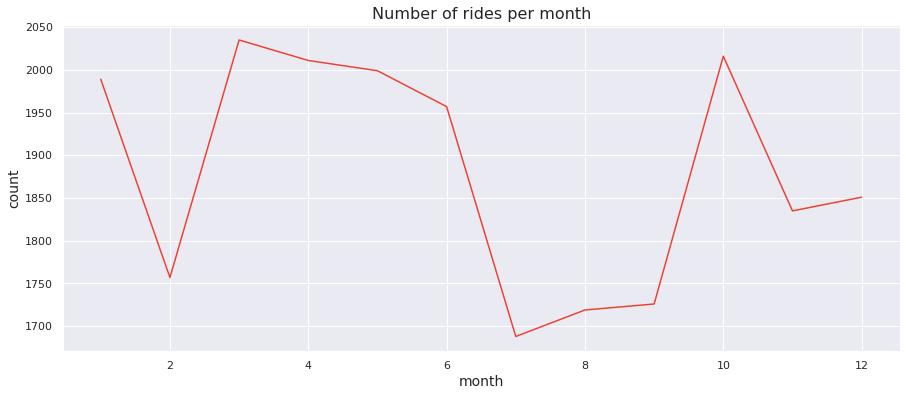

In [29]:
# Create a line plot of total rides per month
ax =sns.lineplot(data=total_per_month, x="month", y="count", color=colors[1])
ax.set_title("Number of rides per month");

**Plot total ride count by day**

Repeat the above process, but now I calculate the total rides by day of the week.

In [30]:
# Repeat the above process, this time for rides by day
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


rides_per_day = df.day.value_counts().reset_index().rename(columns={"index": "day", "day": "count"})
rides_per_day['day'] = pd.Categorical(rides_per_day['day'], categories=ordered_days, ordered=True)
rides_per_day.sort_values("day", inplace=True)
rides_per_day

,day,count
6,Monday,2913
4,Tuesday,3175
3,Wednesday,3364
1,Thursday,3382
0,Friday,3389
2,Saturday,3364
5,Sunday,2996


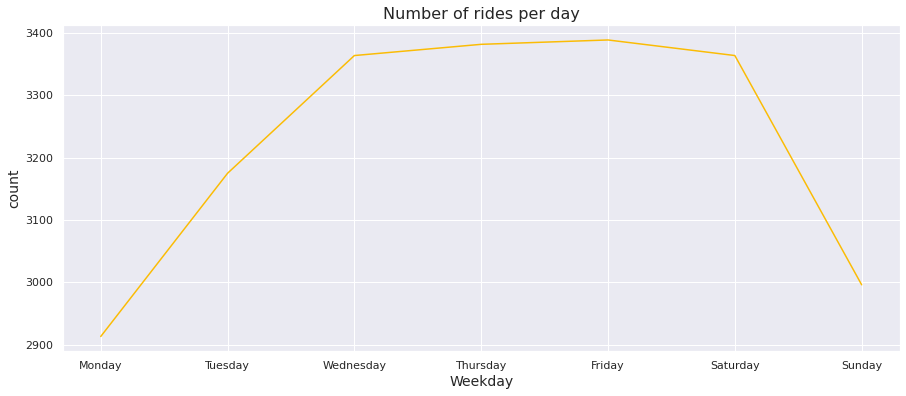

In [31]:
# Create line plot for ride count by day
ax = sns.lineplot(data=rides_per_day, x="day", y="count", color=colors[2])
ax.set_title("Number of rides per day")
ax.set_xlabel("Weekday");

**Plot total revenue by day of the week**

Repeat the above process, but now I calculate the total revenue by day of the week.

In [32]:
# Repeat the process, this time for total revenue by day
revenue_per_day = df.groupby("day").sum()["total_amount"].reset_index().rename(columns={"index": "day", "total_amount": "total_revenue"})
revenue_per_day['day'] = pd.Categorical(revenue_per_day['day'], categories=ordered_days, ordered=True)
revenue_per_day.sort_values("day", inplace=True)
revenue_per_day

,day,total_revenue
1,Monday,48471.33
5,Tuesday,51019.64
6,Wednesday,53632.65
4,Thursday,55981.52
0,Friday,54300.26
2,Saturday,51325.30
3,Sunday,48634.66


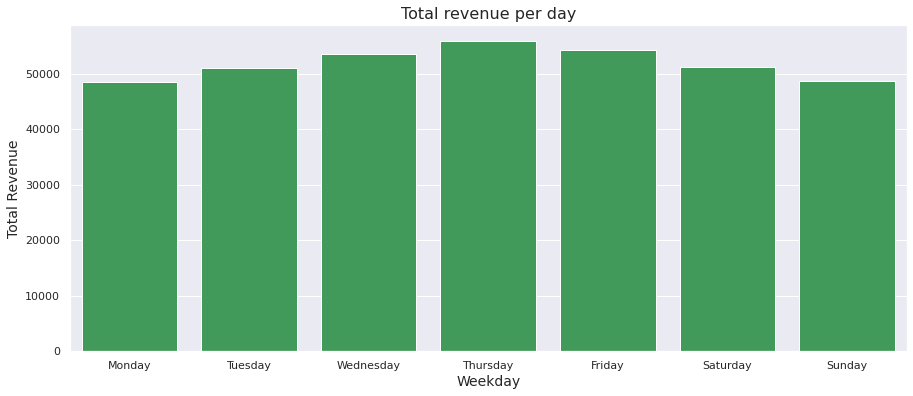

In [33]:
# Create bar plot of total revenue by day
ax = sns.barplot(data=revenue_per_day, x="day", y="total_revenue", color=colors[3])
ax.set_title("Total revenue per day")
ax.set_xlabel("Weekday")
ax.set_ylabel("Total Revenue");

**Plot total revenue by month**

In [34]:
# Repeat the process, this time for total revenue by month
revenue_per_month = df.groupby("month").sum()["total_amount"].reset_index()
revenue_per_month

,month,total_amount
0,1,31266.99
1,2,28232.80
2,3,32152.80
3,4,31696.07
4,5,32903.39
5,6,32508.70
6,7,26165.82
7,8,27395.13
8,9,27734.40
9,10,32384.85


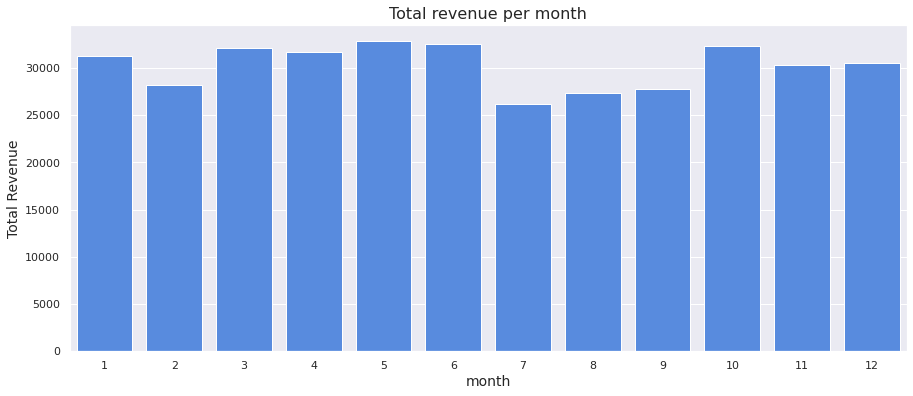

In [35]:
# Create a bar plot of total revenue by month
ax = sns.barplot(data=revenue_per_month, x="month", y="total_amount", color=colors[0])
ax.set_title("Total revenue per month")
ax.set_ylabel("Total Revenue");

**Plot mean trip distance by drop-off location**

In [36]:
# Get number of unique drop-off location IDs
df['DOLocationID'].nunique()

216

In [37]:
# Calculate the mean trip distance for each drop-off location
mean_dis_per_DOL = df.groupby("DOLocationID").mean()["trip_distance"].reset_index()

# Sort the results in descending order by mean trip distance
mean_dis_per_DOL.sort_values("trip_distance", inplace=True)

# print top Drop-Off locations that have highest mean trip distance
mean_dis_per_DOL.tail()

,DOLocationID,trip_distance
40,51,17.310
5,11,17.945
167,210,20.500
21,29,21.650
16,23,24.275


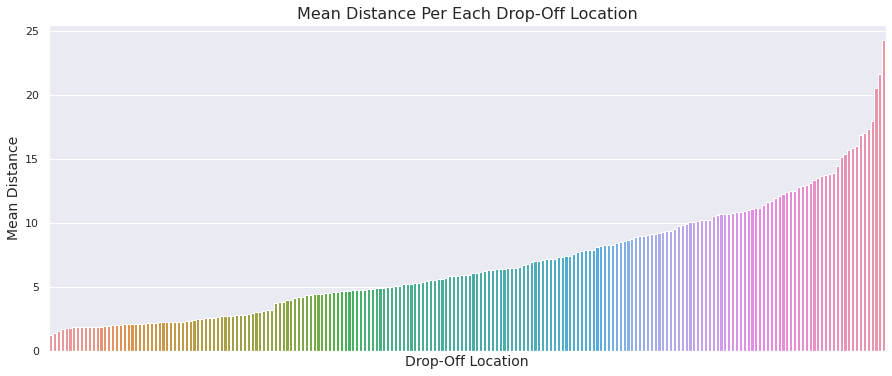

In [38]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
ax = sns.barplot(
    data=mean_dis_per_DOL, 
    x="DOLocationID", 
    y="trip_distance",
    order=mean_dis_per_DOL.DOLocationID)
ax.set_title("Mean Distance Per Each Drop-Off Location")
ax.set_xlabel("Drop-Off Location")
ax.set_ylabel("Mean Distance")
ax.set_xticks([]);

#### plot number of rides from each PULocation

In [39]:
# calculte the number of rides for each PULocation
rides_per_PULocation = df.PULocationID.value_counts().reset_index().rename(columns={"index": "PULocationID", "PULocationID": "count"})

# sort it in descending order
rides_per_PULocation.sort_values("count", inplace=True)

# print the top PULocaiton that have highest number of rides
rides_per_PULocation.tail()

,PULocationID,count
4,162,778
3,236,784
2,186,792
1,161,858
0,237,889


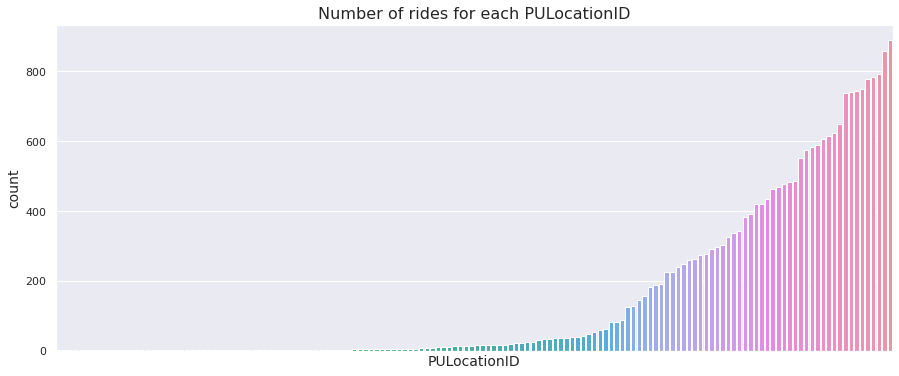

In [40]:
# plot a bar plot of number of rides for each PULocation
ax = sns.barplot(data=rides_per_PULocation,
                 x="PULocationID", 
                 y="count",
                 order=rides_per_PULocation.PULocationID)
ax.set_title("Number of rides for each PULocationID")
ax.set_xticks([]);

#### Corrlation Analysis

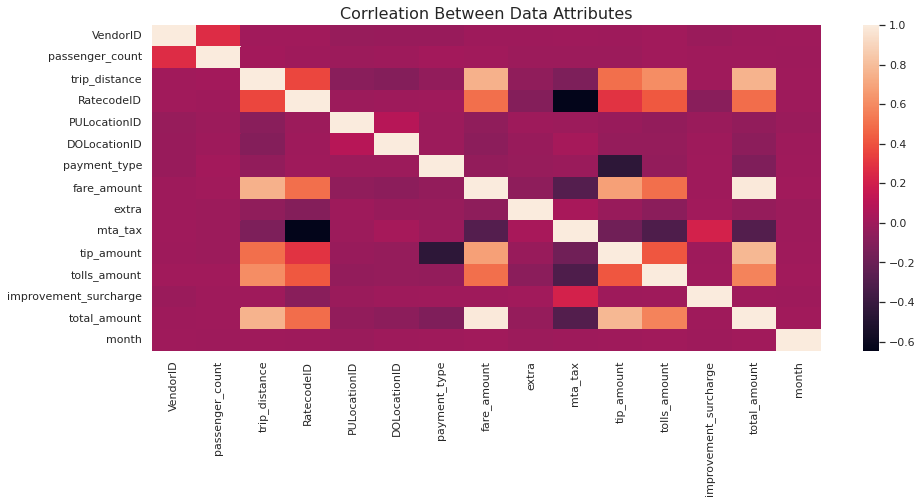

In [41]:
#create a heatmap of data attributes
ax = sns.heatmap(df.corr())
ax.set_title("Corrleation Between Data Attributes");

#### Relationship between trip_distance and fare_amount

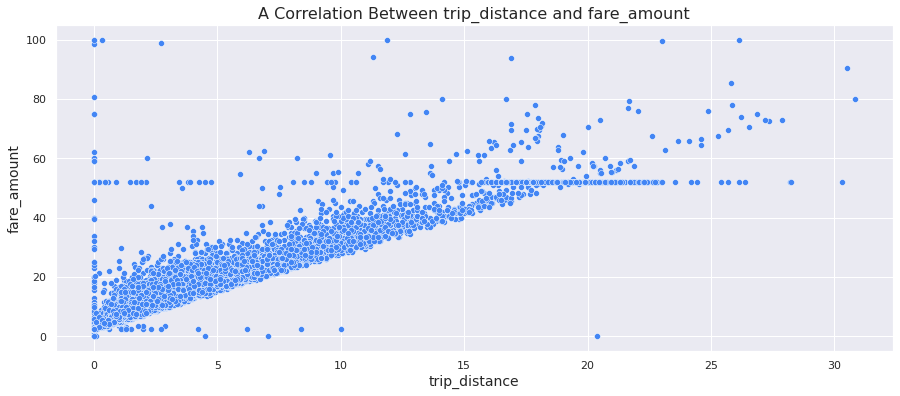

In [42]:
#create a scatter plot for trip_distance and fare_amount
#filter data from outliers
data = df[df.fare_amount <= 100]
ax = sns.scatterplot(data=data, x="trip_distance", y="fare_amount", color=colors[0])
ax.set_title("A Correlation Between trip_distance and fare_amount");

#### Relationship between tip_amount and fare_amount

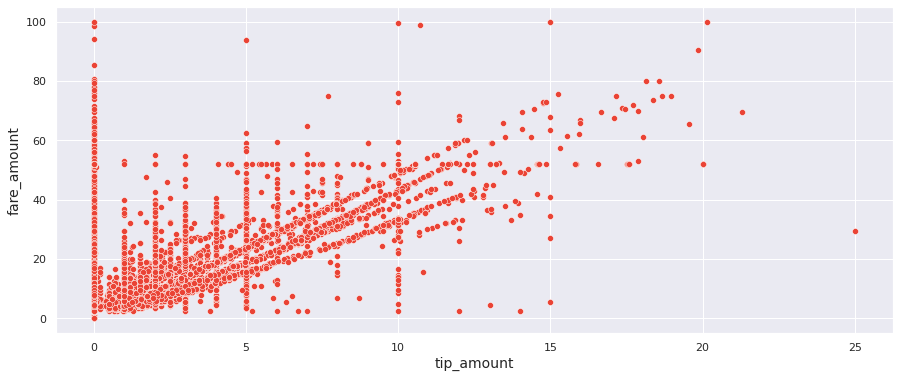

In [43]:
#create a scatter plot for tip_amount and fare_amount
#filter from outliers
data = df[(df.tip_amount <= 25) & (df.fare_amount <= 100)]
ax = sns.scatterplot(data=data, x="tip_amount", y="fare_amount", color=colors[1])

### Tableau dashboard for an executive summary (<a href="https://public.tableau.com/app/profile/mohammed.mustafa.mahomud/viz/Automatidata-EDA/Dashboard1#1">Click Here</a>)

In [44]:
# Save the cleanded data to use it in Tableau
df.to_csv("automatidata-2017.csv")